In [34]:
import nltk
import pandas as pd
import sklearn
import re  
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
## For Stemming
from nltk.tokenize import sent_tokenize, word_tokenize
import os
import string
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import seaborn as sns

In [2]:
os.chdir('/Users/hengxinwu/Desktop/DS Homework/501 Portfolio/NB and SVM/Python')

In [3]:
mydf = pd.read_csv('Text.csv')

In [6]:
TrainDF, TestDF = train_test_split(mydf, test_size=0.3, random_state=1234)

In [7]:
TestLabels = TestDF['LABEL']
print(TestLabels)

37                   Earth's Green Mantle
45                   Earth's Green Mantle
6                         Rivers of Death
44                     Realms of the Soil
13    Surface Waters and Underground Seas
36                   Earth's Green Mantle
8                         Rivers of Death
29        Indiscriminately from the Skies
4                      Realms of the Soil
49                   Earth's Green Mantle
21    Surface Waters and Underground Seas
18        Indiscriminately from the Skies
10                   Earth's Green Mantle
22        Indiscriminately from the Skies
31    Surface Waters and Underground Seas
Name: LABEL, dtype: object


In [8]:
TestDF = TestDF.drop(['LABEL'], axis=1)
TestDF

,able,absorbed,absurdity,abundance,abundant,abundantly,accelerated,accident,accidentally,according,...,yard,year,years,yellow,yield,yolk,york,young,youngest,zone
37,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,0,0,0,2,2,0
44,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
49,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
TrainLabels = TrainDF['LABEL']
print(TrainLabels)

25        Indiscriminately from the Skies
14    Surface Waters and Underground Seas
17        Indiscriminately from the Skies
20        Indiscriminately from the Skies
43                     Realms of the Soil
27    Surface Waters and Underground Seas
1                         Rivers of Death
33                   Earth's Green Mantle
48                     Realms of the Soil
2                         Rivers of Death
32        Indiscriminately from the Skies
35                     Realms of the Soil
39                        Rivers of Death
34                     Realms of the Soil
0                         Rivers of Death
11                   Earth's Green Mantle
7                         Rivers of Death
3                      Realms of the Soil
46                        Rivers of Death
9                    Earth's Green Mantle
16    Surface Waters and Underground Seas
5                      Realms of the Soil
28        Indiscriminately from the Skies
42                   Earth's Green

In [10]:
TrainDF = TrainDF.drop('LABEL', axis=1)

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(TrainDF,TrainLabels)
print(grid.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, k

In [38]:
SVM_Model1=LinearSVC(C=0.1)
SVM_Model1.fit(TrainDF, TrainLabels)

print("SVM prediction:\n", SVM_Model1.predict(TestDF))
print("Actual:")
print(TestLabels)

SVM_matrix = confusion_matrix(TestLabels, SVM_Model1.predict(TestDF))
print("\nThe confusion matrix for Linear SVC C=50 is:")
print(SVM_matrix)
print("\n\n")

SVM prediction:
 ['Rivers of Death' "Earth's Green Mantle" 'Rivers of Death'
 'Realms of the Soil' 'Surface Waters and Underground Seas'
 "Earth's Green Mantle" 'Rivers of Death'
 'Indiscriminately from the Skies' 'Rivers of Death'
 'Surface Waters and Underground Seas'
 'Surface Waters and Underground Seas' 'Indiscriminately from the Skies'
 "Earth's Green Mantle" 'Indiscriminately from the Skies'
 'Surface Waters and Underground Seas']
Actual:
37                   Earth's Green Mantle
45                   Earth's Green Mantle
6                         Rivers of Death
44                     Realms of the Soil
13    Surface Waters and Underground Seas
36                   Earth's Green Mantle
8                         Rivers of Death
29        Indiscriminately from the Skies
4                      Realms of the Soil
49                   Earth's Green Mantle
21    Surface Waters and Underground Seas
18        Indiscriminately from the Skies
10                   Earth's Green Mantle
22  

<AxesSubplot:>

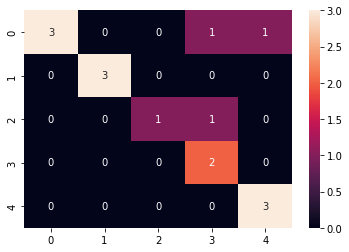

In [39]:
sns.heatmap(SVM_matrix, annot=True)

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(TrainDF,TrainLabels)
print(grid.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

In [36]:
## RBF
SVM_Model2=sklearn.svm.SVC(C=100, kernel='rbf', 
                           verbose=True, gamma=0.001)
SVM_Model2.fit(TrainDF, TrainLabels)

print("SVM prediction:\n", SVM_Model2.predict(TestDF))
print("Actual:")
print(TestLabels)

SVM_matrix2 = confusion_matrix(TestLabels, SVM_Model2.predict(TestDF))
print("\nThe confusion matrix for rbf SVM is:")
print(SVM_matrix)
print("\n\n")

[LibSVM].*.*
optimization finished, #iter = 27
obj = -31.910108, rho = -0.160588
nSV = 12, nBSV = 0
.*
optimization finished, #iter = 23
obj = -23.877914, rho = -0.327052
nSV = 12, nBSV = 0
.*.*
optimization finished, #iter = 31
obj = -27.888880, rho = -0.253292
nSV = 13, nBSV = 0
.*.*
optimization finished, #iter = 26
obj = -27.851454, rho = -0.188417
nSV = 12, nBSV = 0
.*
optimization finished, #iter = 27
obj = -34.620024, rho = -0.251954
nSV = 13, nBSV = 0
.*.*
optimization finished, #iter = 33
obj = -45.071758, rho = -0.065912
nSV = 15, nBSV = 0
.*.*
optimization finished, #iter = 30
obj = -40.268491, rho = 0.173729
nSV = 14, nBSV = 0
.*
optimization finished, #iter = 29
obj = -30.489431, rho = 0.209313
nSV = 14, nBSV = 0
.*.*
optimization finished, #iter = 30
obj = -29.548053, rho = 0.233642
nSV = 14, nBSV = 0
.*.*
optimization finished, #iter = 35
obj = -45.279210, rho = 0.211308
nSV = 15, nBSV = 0
Total nSV = 34
SVM prediction:
 ['Rivers of Death' 'Surface Waters and Underground

<AxesSubplot:>

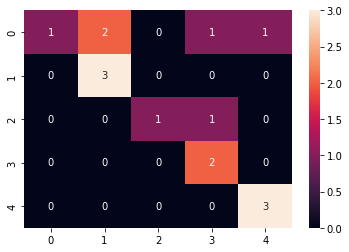

In [37]:
sns.heatmap(SVM_matrix2, annot=True)

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001], 'degree':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],'kernel': ['poly']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(TrainDF,TrainLabels)
print(grid.best_estimator_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=1, gamma=0.0

[CV] END ............C=0.1, degree=6, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=6, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=6, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=6, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=6, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=6, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=6, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=6, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=6, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=6, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=6, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=6, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, de

[CV] END .............C=1, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .............C=1, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .............C=1, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ............C=1, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ................C=1, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END ................C=1, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END ................C=1, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END ................C=1, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END ................C=1

[CV] END ............C=1, degree=6, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ............C=1, degree=6, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ............C=1, degree=6, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ............C=1, degree=6, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ............C=1, degree=6, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ................C=1, degree=7, gamma=1, kernel=poly; total time=   0.0s
[CV] END ................C=1, degree=7, gamma=1, kernel=poly; total time=   0.0s
[CV] END ................C=1, degree=7, gamma=1, kernel=poly; total time=   0.0s
[CV] END ................C=1, degree=7, gamma=1, kernel=poly; total time=   0.0s
[CV] END ................C=1, degree=7, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=1, degree=7, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ..............C=1, degree=7, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ..............C=1, 

[CV] END ...........C=10, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...........C=10, degree=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...............C=10, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...............C=10, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...............C=10, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...............C=10, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...............C=10, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END .............C=10, degree=2, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .............C=10, degree=2, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .............C=10, degree=2, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .............C=10, degree=2, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .............C=10, 

[CV] END ...............C=10, degree=7, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...............C=10, degree=7, gamma=1, kernel=poly; total time=   0.0s
[CV] END .............C=10, degree=7, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .............C=10, degree=7, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .............C=10, degree=7, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .............C=10, degree=7, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .............C=10, degree=7, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ............C=10, degree=7, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ............C=10, degree=7, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ............C=10, degree=7, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ............C=10, degree=7, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ............C=10, degree=7, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...........C=10, de

[CV] END ...........C=100, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...........C=100, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...........C=100, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...........C=100, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...........C=100, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=100, degree=2, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..............C=100, degree=3, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=100, degree=3, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=100

[CV] END ..........C=100, degree=7, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=100, degree=7, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=100, degree=7, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=100, degree=7, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..........C=100, degree=7, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..............C=100, degree=8, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=100, degree=8, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=100, degree=8, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=100, degree=8, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=100, degree=8, gamma=1, kernel=poly; total time=   0.0s
[CV] END ............C=100, degree=8, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ............C=100, degree=8, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ............C=100, 

In [32]:
SVM_Model3=sklearn.svm.SVC(C=0.1, kernel='poly',degree=1,
                           gamma=1, verbose=True)

print(SVM_Model3)
SVM_Model3.fit(TrainDF, TrainLabels)

print("SVM prediction:\n", SVM_Model3.predict(TestDF))
print("Actual:")
print(TestLabels)

SVM_matrix3 = confusion_matrix(TestLabels, SVM_Model3.predict(TestDF))
print("\nThe confusion matrix for SVM poly d=2  is:")
print(SVM_matrix)
print("\n\n")

SVC(C=0.1, degree=1, gamma=1, kernel='poly', verbose=True)
[LibSVM].*.*
optimization finished, #iter = 25
obj = -0.058162, rho = 0.394220
nSV = 12, nBSV = 0
.*
optimization finished, #iter = 24
obj = -0.043019, rho = 0.101037
nSV = 11, nBSV = 0
.*
optimization finished, #iter = 25
obj = -0.050295, rho = 0.267841
nSV = 13, nBSV = 0
.*.*
optimization finished, #iter = 26
obj = -0.050236, rho = 0.172537
nSV = 12, nBSV = 0
.*.*
optimization finished, #iter = 35
obj = -0.063361, rho = -0.290653
nSV = 13, nBSV = 0
.*.*
optimization finished, #iter = 34
obj = -0.082839, rho = -0.124639
nSV = 15, nBSV = 0
.*.*
optimization finished, #iter = 31
obj = -0.073811, rho = -0.252316
nSV = 14, nBSV = 0
.*
optimization finished, #iter = 28
obj = -0.055278, rho = 0.172612
nSV = 14, nBSV = 0
.*.*
optimization finished, #iter = 30
obj = -0.053555, rho = 0.072593
nSV = 13, nBSV = 0
.*.*
optimization finished, #iter = 34
obj = -0.083804, rho = -0.209513
nSV = 15, nBSV = 0
Total nSV = 33
SVM prediction:
 ['R

<AxesSubplot:>

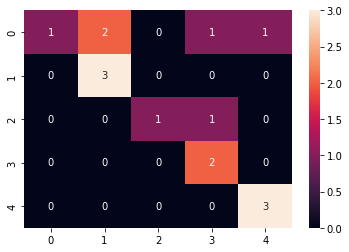

In [35]:
sns.heatmap(SVM_matrix3, annot=True)